# Analysis for MODS calculation with Outcomes (10/25/15)


<ul>
<li><b>376</b> patients with complete MODS from day 2 to day 5 </li>
<li>Types of MODS calculation:
  <ol>
  <li><b>Individual MODS</b>: <b><font color = 90EE90> MOD2, MOD3, MOD4, MOD5 </font></b> </li>
  <li><b>Maximum MODS between day i and day j</b>: <b> <font color = #00BFF> M23, M24, M25, M34, M35, M45 </font> </b></li>
  <li><b>Average MODS between day i and day j</b>: <b><font color = "pink"> A23, A24, A25, A34, A35, A45 </font> </b></li>
  </ol>
</li>
<li>Outcome variables:
  <ol type="1">
  <li><a href='#Infection'><b>Infection</b></a></li>
  <li><a href='#ICULOS'><b>ICU LOS</b></a></li>
  <li><a href='#TotalLOS'><b>Total LOS</b></a></li>
  <li><a href='#FreeICU'><b>Free ICU Days</b></a> <i> Define as: Totoal LOS - ICU LOS </i> </li>
  <li><a href='#FreeICUPer'><b>Free ICU Days Percentage</b></a> <i> Define as: (Total LOS - ICU LOS)/ Total LOS x 100 </i></li>
  <li><a href='#Vent'><b>Ventilation</b></a></li>
  <li><a href='#FreeVent'><b>Free Vent Days</b></a> <i>Define as: ICU LOS - Ventilation</i></li>
  <li><a href='#FreeVentPer'><b>Free Vent Days Percentage</b></a> <i>Define as: (ICU LOS - Ventilation)/ ICU LOS x 100 </i></li>
  <li><a href='#Destination'><b>Destination</b></a>
  <ol>
  <li><a href='#Home'>Home</a></li>
  <li><a href='#NotHome'>Not-Home</a></li>
  <li><a href='#SNF'>SNF</a></li>
  <li><a href='#Rehab'>Rehab</a></li>
  <li><a href='#Acute'>Acute Care Facility</a>, etc</li>
  </ol>
   </li>
  </ol>
</li>
<li>Other variables:
  <ol type="1">
  <li><a href='#ISS'><b>ISS</b></a></li>
  <li><a href='#Accident'><b>Accident</b></a></li>
  <li><a href='#Age'><b>Age</b></a></li>
  <li><a href='#Sex'><b>Sex</b></a></li>  
   </ol>
</li>
<li>Method:
  <ul>
  <li><b>Select the patients with MODS calcuation value >=5 which are corresponding to top 80%-85% of total patients</b></li>
  <li><b>For the outcomes with numeric values, compare their median, mean values across different MODS calcuations</b></li>
  <li><b>For the outcomes with category values, compare their percentage values across different MODS calcuations</b></li>
   </ul>
</li>
<li><a href='#Summary'><b>Summary Table</b> </a></li>
</ul>


In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
mods = pd.read_excel("MODS-cluster-V3.xlsx")



In [2]:
#mods.Destination.unique()
#mods.Sex.unique()
#mods.Destination.unique()
#mods.columns
#mods.Age.hist()

In [3]:
mods['Age_T']= 80
mods.loc[mods['Age']<=70 ,'Age_T']= 70
mods.loc[mods['Age']<=60 ,'Age_T']= 60
mods.loc[mods['Age']<=50 ,'Age_T']= 50
mods.loc[mods['Age']<=40 ,'Age_T']= 40
mods.loc[mods['Age']<=30 ,'Age_T']= 30
mods.loc[mods['Age']<=20 ,'Age_T']= 20
#mods[mods['Age_T'] == 70]

In [4]:
modsdata = mods[["Patient ID","MOD2","MOD3","MOD4","MOD5","Infection","Age","Sex",
                 "ICU LOS","Total LOS","Ventilation","Destination","ISS","Accident","Age_T"]]
modsdata2 = modsdata.set_index('Patient ID') # change index to Paitent ID
nanvalue =  modsdata2.count(axis = 1) # nanvalue is a series , get the non-nan value
nanvalue[nanvalue == 4]
nanvalue[nanvalue == 3]
nanvalue[nanvalue == 2]
nanvalue[nanvalue == 1]
data4 = modsdata2[nanvalue == 4]
data3 = modsdata2[nanvalue == 3]
data2 = modsdata2[nanvalue == 2]
data1 = modsdata2[nanvalue == 1]
data = modsdata2[nanvalue == 14]

#modsdata2
#data.shape

In [5]:
import warnings
warnings.filterwarnings('ignore')

data['FreeVentDaysPer'] = (data['ICU LOS'] - data['Ventilation'])/data['ICU LOS']*100
data['FreeVentDays'] = (data['ICU LOS'] - data['Ventilation'])
data['FreeICUDays'] = (data['Total LOS'] - data['ICU LOS'])
data['FreeICUDaysPer'] = (data['Total LOS'] - data['ICU LOS'])/data['Total LOS']*100
#data[data['FreeVentDays']<0]
#data[data['FreeICUDays']<0]

In [6]:
data['S25']=  data[['MOD2','MOD3','MOD4','MOD5']].sum(axis=1);
data['S24'] = data[['MOD2','MOD3','MOD4']].sum(axis=1);
data['S23'] = data[['MOD2','MOD3']].sum(axis=1);
data['S35'] = data[['MOD3','MOD4','MOD5']].sum(axis=1);
data['S34'] = data[['MOD3','MOD4']].sum(axis=1);
data['S45'] = data[['MOD4','MOD5']].sum(axis=1);
data['M25']=  data[['MOD2','MOD3','MOD4','MOD5']].max(axis=1);
data['M24'] = data[['MOD2','MOD3','MOD4']].max(axis=1);
data['M23'] = data[['MOD2','MOD3']].max(axis=1);
data['M35'] = data[['MOD3','MOD4','MOD5']].max(axis=1);
data['M34'] = data[['MOD3','MOD4']].max(axis=1);
data['M45'] = data[['MOD4','MOD5']].max(axis=1);
data['A25']=  data[['MOD2','MOD3','MOD4','MOD5']].mean(axis=1);
data['A24'] = data[['MOD2','MOD3','MOD4']].mean(axis=1);
data['A23'] = data[['MOD2','MOD3']].mean(axis=1);
data['A35'] = data[['MOD3','MOD4','MOD5']].mean(axis=1);
data['A34'] = data[['MOD3','MOD4']].mean(axis=1);
data['A45'] = data[['MOD4','MOD5']].mean(axis=1);


In [38]:
cutoff = list([25, 50, 75, 80, 85, 90, 95]) 
f =  lambda x: np.percentile(d,x)
# cutoffvalue = map( f, cutoff) 

cutoffvalueMOD2 = [np.percentile(data.MOD2.values,x, interpolation='higher') for x in cutoff]
cutoffvalueM23 = [np.percentile(data.M23.values,x, interpolation='higher') for x in cutoff]
cutoffvalueM24 = [np.percentile(data.M24.values,x, interpolation='higher') for x in cutoff]
cutoffvalueM25 = [np.percentile(data.M25.values,x, interpolation='higher') for x in cutoff]
cutoffvalueMOD3 = [np.percentile(data.MOD3.values,x, interpolation='higher') for x in cutoff]
cutoffvalueM34 = [np.percentile(data.M34.values,x, interpolation='higher') for x in cutoff]
cutoffvalueM35 = [np.percentile(data.M35.values,x, interpolation='higher') for x in cutoff]
cutoffvalueMOD4 = [np.percentile(data.MOD4.values,x,interpolation='higher') for x in cutoff]
cutoffvalueM45 = [np.percentile(data.M45.values,x,interpolation='higher') for x in cutoff]
cutoffvalueMOD5 = [np.percentile(data.MOD5.values,x,interpolation='higher') for x in cutoff]


cutoffvalueS23 = [np.percentile(data.S23.values,x, interpolation='higher') for x in cutoff]
cutoffvalueS24 = [np.percentile(data.S24.values,x, interpolation='higher') for x in cutoff]
cutoffvalueS25 = [np.percentile(data.S25.values,x, interpolation='higher') for x in cutoff]
cutoffvalueS34 = [np.percentile(data.S34.values,x, interpolation='higher') for x in cutoff]
cutoffvalueS35 = [np.percentile(data.S35.values,x, interpolation='higher') for x in cutoff]
cutoffvalueS45 = [np.percentile(data.S45.values,x,interpolation='higher') for x in cutoff]

cutoffvalueA23 = [np.percentile(data.A23.values,x, interpolation='higher') for x in cutoff]
cutoffvalueA24 = [np.percentile(data.A24.values,x, interpolation='higher') for x in cutoff]
cutoffvalueA25 = [np.percentile(data.A25.values,x, interpolation='higher') for x in cutoff]
cutoffvalueA34 = [np.percentile(data.A34.values,x, interpolation='higher') for x in cutoff]
cutoffvalueA35 = [np.percentile(data.A35.values,x, interpolation='higher') for x in cutoff]
cutoffvalueA45 = [np.percentile(data.A45.values,x,interpolation='higher') for x in cutoff]
cutoffvalueA24

[0.0, 1.0, 3.0, 3.3333333333333335, 4.0, 4.666666666666667, 6.666666666666667]

In [8]:
import prettyplotlib as ppl
def PlotData(data,attr,value, cut):
    fig, ax1 = plt.subplots(figsize=(13,6))
    xticklabels = ['MOD2','MOD3','MOD4','MOD5','M23','M24','M25','M34','M35','M45', 'A23','A24','A25','A34','A35','A45']
    out = []
    for k in range(16):  
        name = xticklabels[k]
        temp1 = getattr(data,name)
        temp2 = getattr(data[temp1 >= cut],attr)
        total = temp2.shape[0] / 100
        temp = temp2.value_counts() / total
        out.append(temp[value])
        
    
    colors = ['lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightblue','lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue','pink', 
              'pink', 'pink', 'pink', 'pink','pink'] 
    ppl.bar(ax1,np.arange(16),out, annotate = True, xticklabels = xticklabels, color = colors )
    #plt.bar(range(16),out, color= colors)
    #xtickNames = plt.setp(ax1, xticklabels=xticklabels)
    ax1.set_title('Comparison of Percentage of '+ attr + '='+ str(value)+ ' Across Different Calculation of MODS with cutoff >='+ str(cut),
                  fontweight="bold", fontsize = 13)
    ax1.set_ylabel('Percentage')
    #ax1.set_xticklabels(xticklabels, rotation=45, fontsize=12)
    plt.show()

    


<h2> Results </h2>
<a id='Infection'>Figure 1: Infection </a>

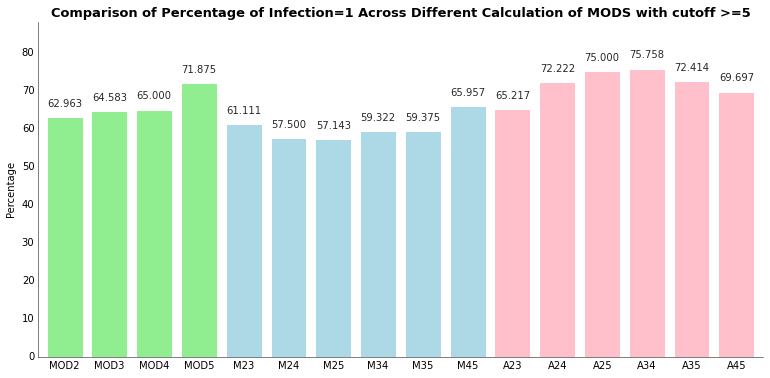

In [9]:
PlotData(data,'Infection',1, 5)

In [10]:
def boxplotData(data, attr, cut):
    fig, ax1 = plt.subplots(figsize=(11,6))
    #fig.canvas.set_window_title('A Boxplot Example')
    plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)
    boxdata = [ getattr(data[data.MOD2 >= cut], attr).values, getattr(data[data.MOD3 >= cut],attr).values, getattr(data[data.MOD4 >= cut],attr).values, getattr(data[data.MOD5 >= cut], attr).values,
        getattr(data[data.M23 >= cut], attr).values, getattr(data[data.M24 >= cut],attr).values, getattr(data[data.M25 >= cut], attr).values,
        getattr(data[data.M34 >= cut], attr).values, getattr(data[data.M35 >= cut],attr).values, getattr(data[data.M45 >= cut], attr).values,
        getattr(data[data.A23 >= cut], attr).values, getattr(data[data.A24 >= cut], attr).values, getattr(data[data.A25 >= cut], attr).values,
        getattr(data[data.A34 >= cut], attr).values, getattr(data[data.A35 >= cut], attr).values, getattr(data[data.A45 >= cut], attr).values ]
    
    box = boxplot(boxdata, patch_artist = True, vert=True, showmeans=True)

    # Hide these grid behind plot objects
    ax1.set_axisbelow(True)
    #ax1.set_title('Comparison of IID Bootstrap Resampling Across Five Distributions')
    #ax1.set_xlabel('Distribution')
    ax1.set_ylabel(attr) 
    
    colors = ['lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightblue','lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue','pink', 
              'pink', 'pink', 'pink', 'pink','pink']
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
    ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
    xticklabels = ['MOD2','MOD3','MOD4','MOD5','M23','M24','M25','M34','M35','M45', 'A23','A24','A25','A34','A35','A45']
    xtickNames = plt.setp(ax1, xticklabels=xticklabels)
    ax1.set_title('Comparison of '+ attr + ' Across Different Calculation of MODS with cutoff >='+ str(cut),
                 fontweight="bold", fontsize = 13)
    plt.setp(xtickNames, rotation=45, fontsize=12)
    top = np.max([np.percentile(s,75) for s in boxdata]) + 5
    numboxes = 16
    upperLabels = [str(np.round(np.median(s), 1)) for s in boxdata]
    pos = np.arange(numboxes)+1
    
    for tick,label in zip(range(numboxes),ax1.get_xticklabels()):
        ax1.text(pos[tick], top-(top*0.05), upperLabels[tick],horizontalalignment='center', size='medium')
    plt.show()
    

#boxplotData(data,'ISS',5)
#boxplotData(data,'ICU LOS',5)
#boxplotData(data,'Total LOS',5)
#boxplotData(data, 'Ventilation', 5)



<a id='ICULOS'>Figure 2: ICU LOS </a> 
<ul>
<li>The red line in box and numeric values represent the median value</li>
<li>The red samll squares in box represent the mean value</li>
</ul>

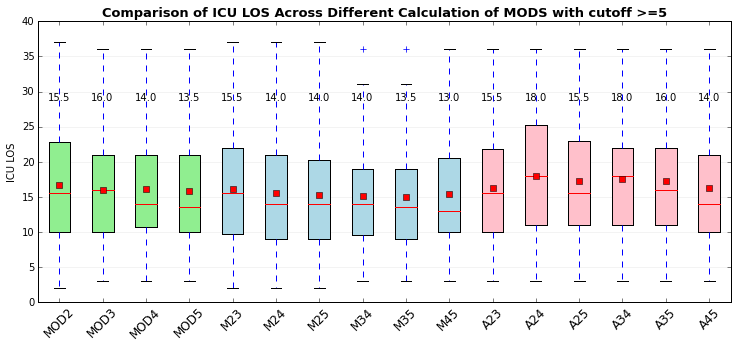

In [11]:
boxplotData(data,'ICU LOS',5)

<a id='TotalLOS'>Figure 3: Total LOS </a>

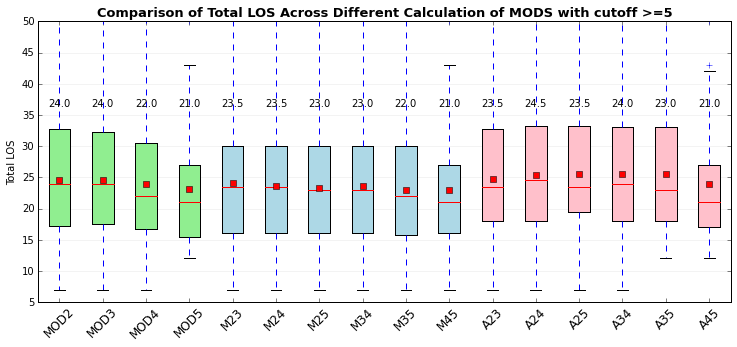

In [12]:
boxplotData(data,'Total LOS',5)

<a id='FreeICU'>Figure 4: Free ICU Days </a>

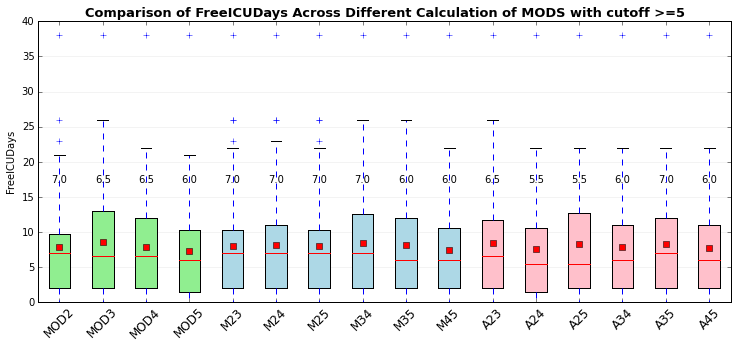

In [13]:
boxplotData(data,'FreeICUDays',5)

<a id='FreeICUPer'> Figure 5: Free ICU Days Percentage </a>

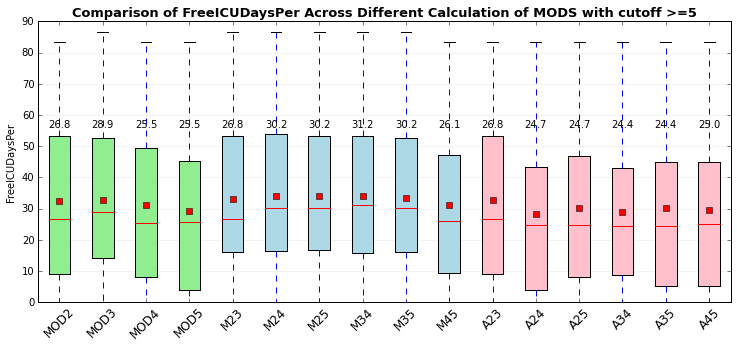

In [14]:
boxplotData(data,'FreeICUDaysPer',5)

<a id='Vent'>Figure 6: Ventilation Days</a>

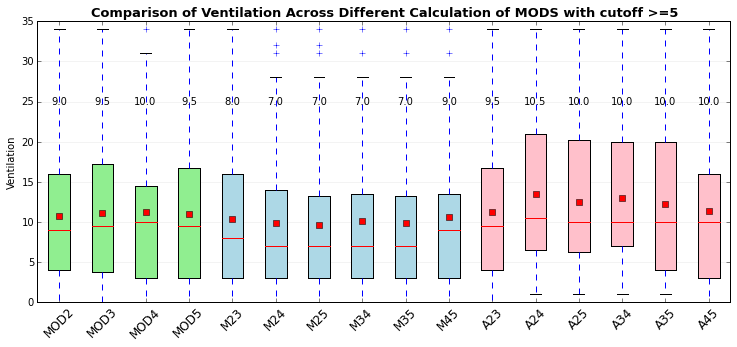

In [15]:
boxplotData(data, 'Ventilation', 5)

<a id='FreeVent'>Figure 7: Free Ventilation Days </a>

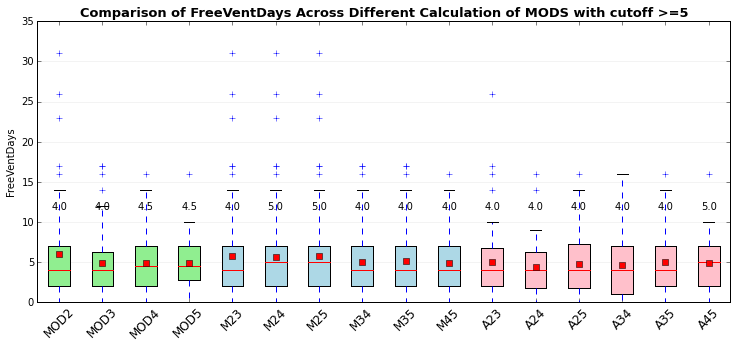

In [16]:
boxplotData(data,'FreeVentDays',5)

<a id='FreeVentPer'>Figure 8: Free Ventilation Days Percentage</a>

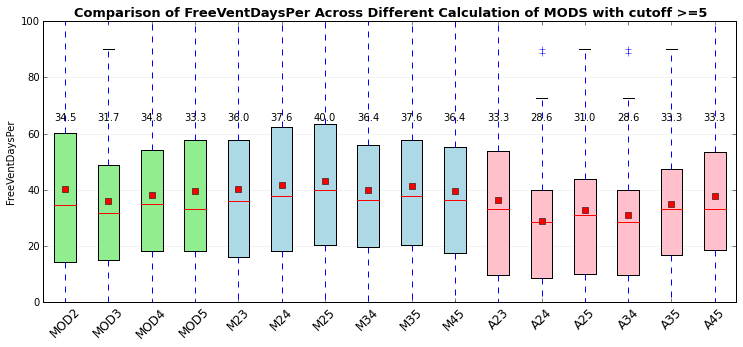

In [17]:
boxplotData(data,'FreeVentDaysPer',5)

In [18]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 15)
def multiPlotData(data,attr,cut, ylim):
    xticklabels = ['MOD2','MOD3','MOD4','MOD5','M23','M24','M25','M34','M35','M45', 'A23','A24','A25','A34','A35','A45']
    #plt.figure(num=None, figsize=(50, 30), dpi=80, facecolor='w', edgecolor='k')
    f,axes = plt.subplots(4,4)
    for i in range(4):
        for j in range(4):
            k = i*4 + j
            name = xticklabels[k]
            temp1 = getattr(data,name)
            temp2 = getattr(data[temp1 >= cut],attr)
            total = temp2.shape[0] / 100
            temp = temp2.value_counts() / total
            axes[i,j].yaxis.grid(True, linestyle='-', which='major', color='grey',alpha=1)
            colors = ['lightblue', 'pink', 'g', 'y', 'k' , 'lightblue','tan','lightgreen']
            temp.plot('bar', ax = axes[i,j], title = name, rot =30, color = colors, ylim=[0,ylim])
    plt.show()

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


<a id='Destination'>Figure 9: Desintation</a>

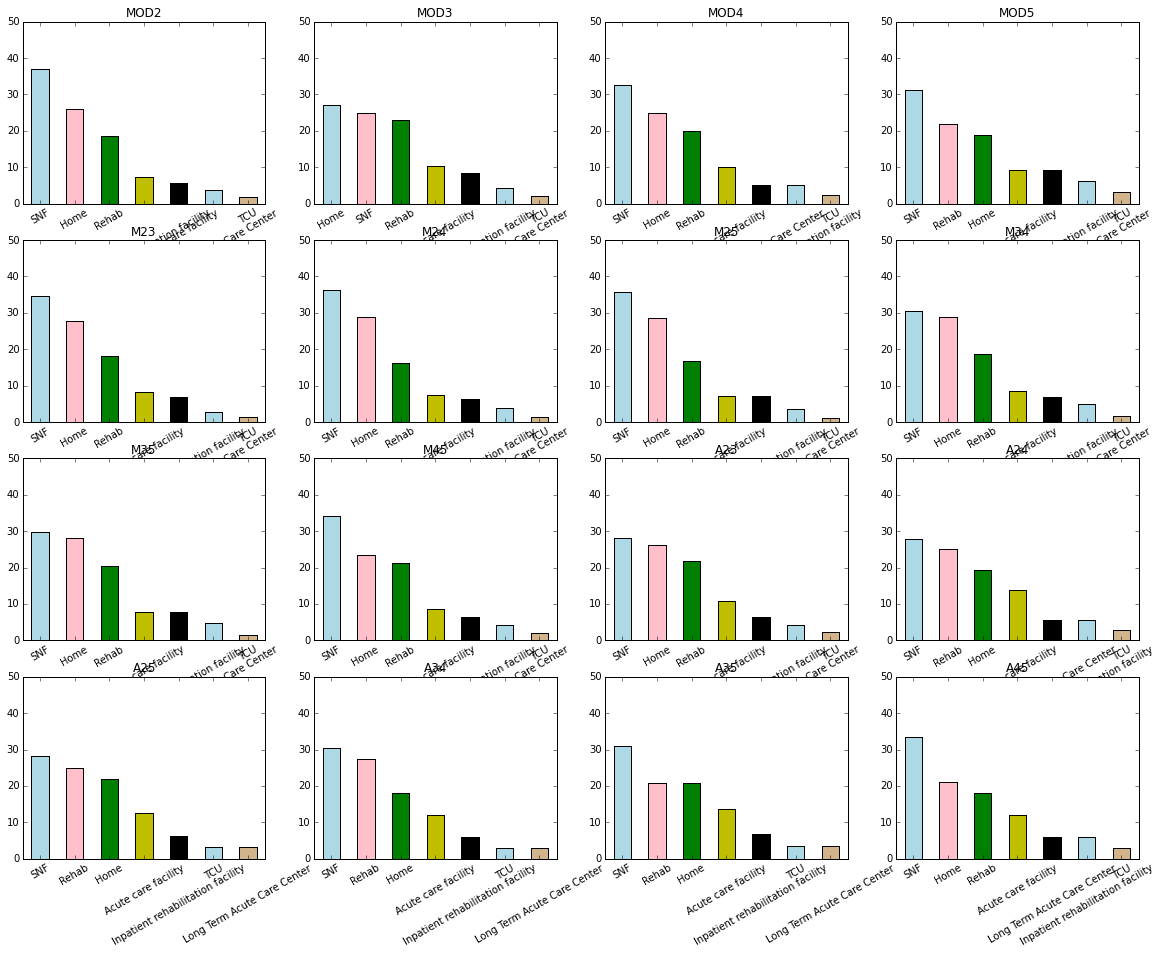

In [19]:

multiPlotData(data, 'Destination',5,50)


<a id='Home'>Figure 10, Destionation-Home</a>

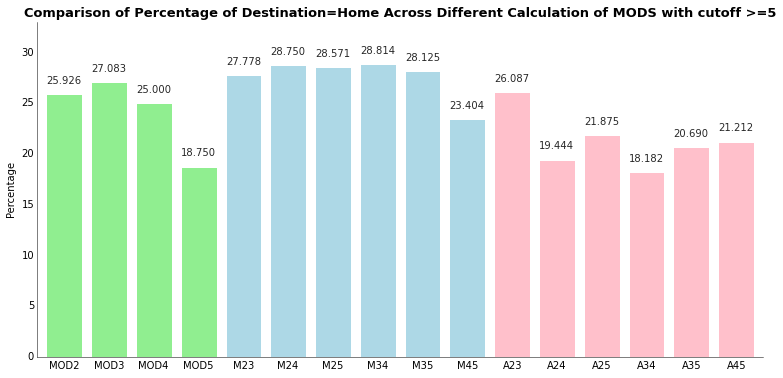

In [20]:
PlotData(data,'Destination','Home', 5)

In [21]:
import prettyplotlib as ppl
def PlotDataNot(data,attr,value, cut):
    fig, ax1 = plt.subplots(figsize=(13,6))
    xticklabels = ['MOD2','MOD3','MOD4','MOD5','M23','M24','M25','M34','M35','M45', 'A23','A24','A25','A34','A35','A45']
    out = []
    for k in range(16):  
        name = xticklabels[k]
        temp1 = getattr(data,name)
        temp2 = getattr(data[temp1 >= cut],attr)
        total = temp2.shape[0] / 100
        temp = temp2.value_counts() / total
        out.append(temp[value])
    
    out[:] = [100 - x for x in out]
    
    colors = ['lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightblue','lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue','pink', 
              'pink', 'pink', 'pink', 'pink','pink'] 
    ppl.bar(ax1,np.arange(16),out, annotate = True, xticklabels = xticklabels, color = colors )
    #plt.bar(range(16),out, color= colors)
    #xtickNames = plt.setp(ax1, xticklabels=xticklabels)
    ax1.set_title('Comparison of Percentage of '+ attr + '=Not'+ str(value)+ ' Across Different Calculation of MODS with cutoff >='+ str(cut),
                  fontweight="bold", fontsize = 13)
    ax1.set_ylabel('Percentage')
    #ax1.set_xticklabels(xticklabels, rotation=45, fontsize=12)
    plt.show()

<a id='NotHome'>Figure 11, Destination-NotHome</a>

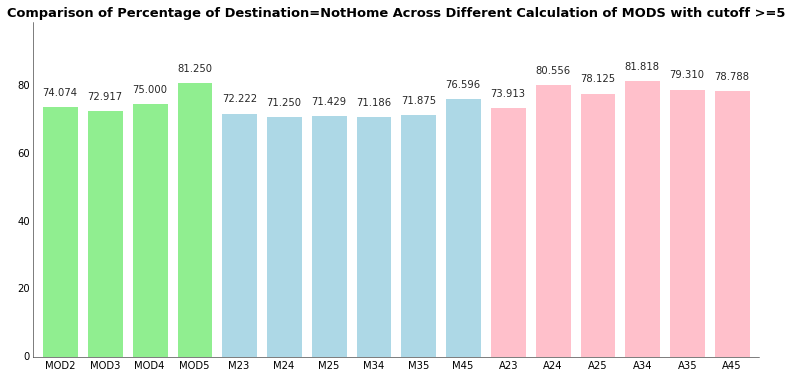

In [22]:
PlotDataNot(data,'Destination','Home', 5)

<a id='SNF'>Figure 12, Destination-SNF</a>

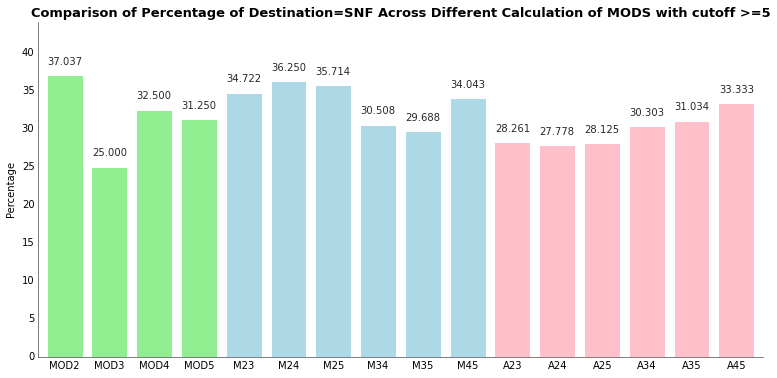

In [23]:

PlotData(data,'Destination','SNF', 5)

<a id='Rehab'>Figure 13, Destination-Rehab</a>

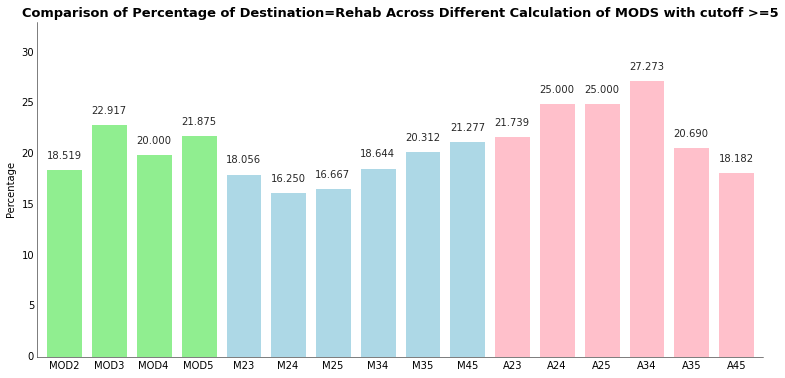

In [24]:
PlotData(data,'Destination','Rehab', 5)

<a id='Acute'>Figure 14, Destination-Acute</a>

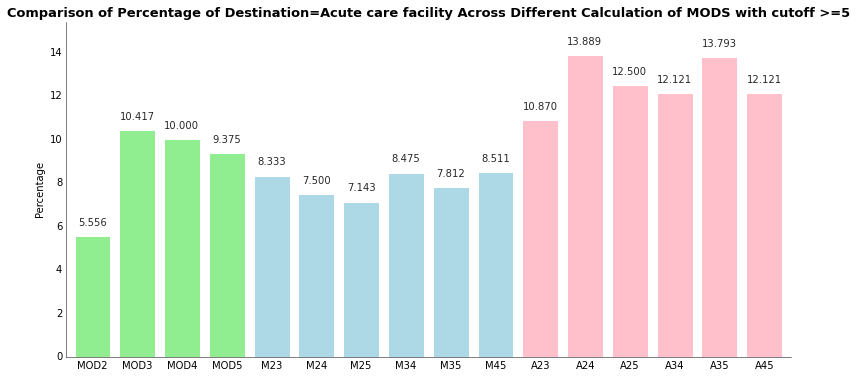

In [25]:
PlotData(data,'Destination','Acute care facility', 5)

<a id='ISS'>Figure 15, ISS</a>

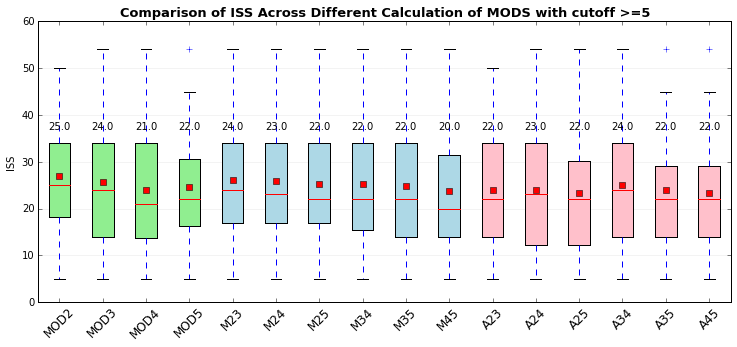

In [26]:
boxplotData(data,'ISS',5)

<a id='Accident'>Figure 16: Accident</a>

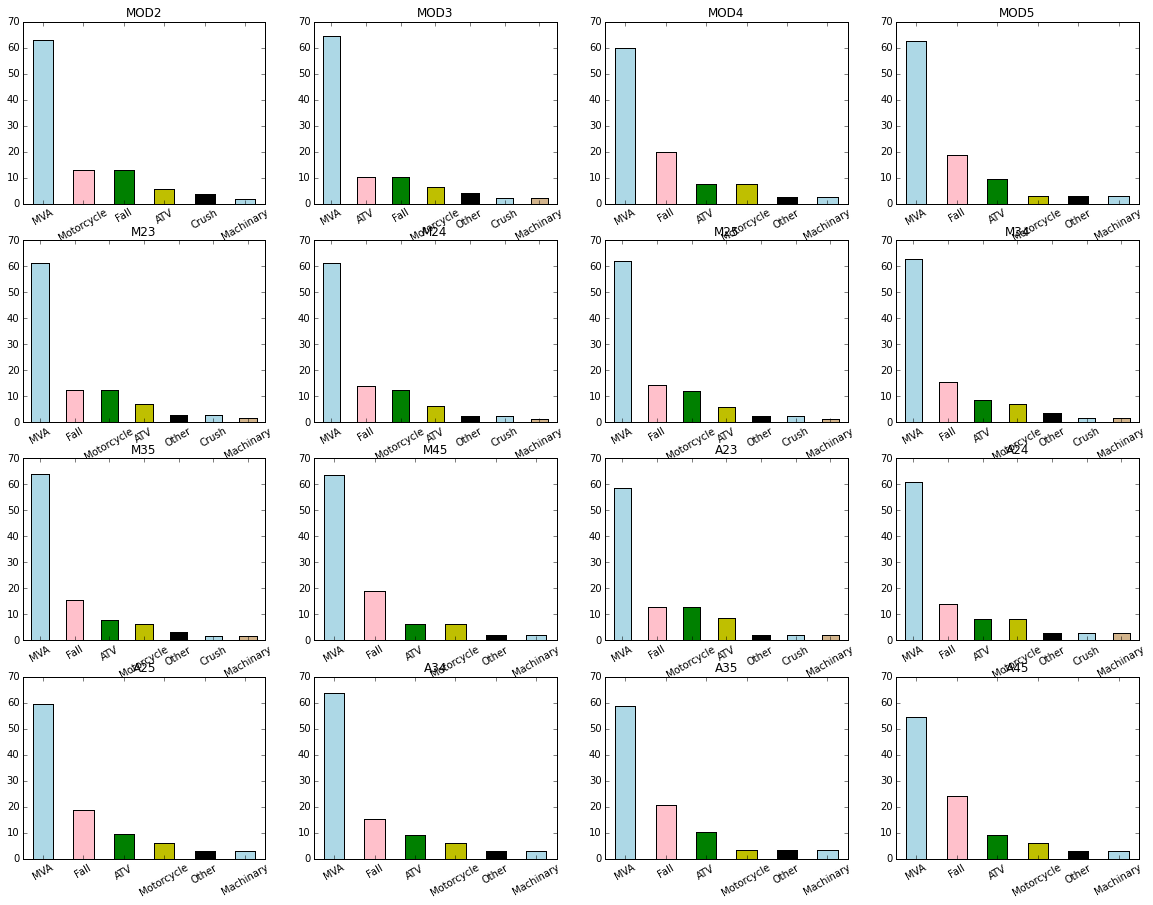

In [27]:
multiPlotData(data,'Accident',5,70)

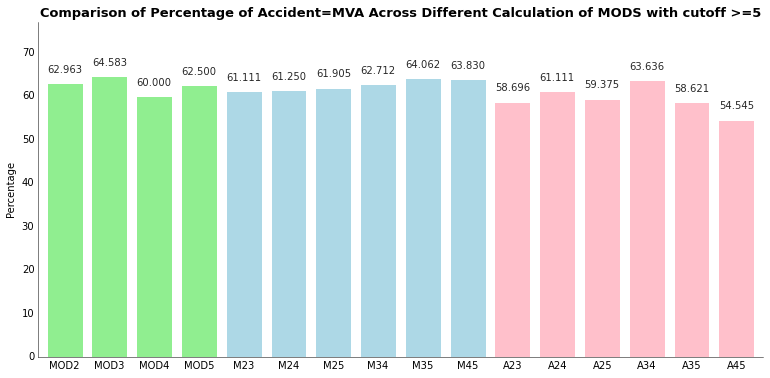

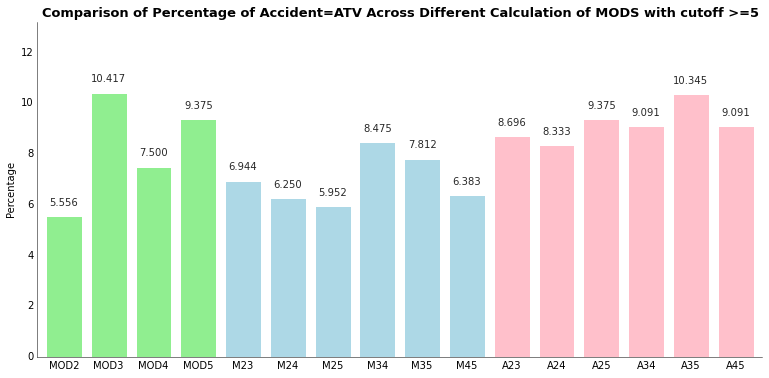

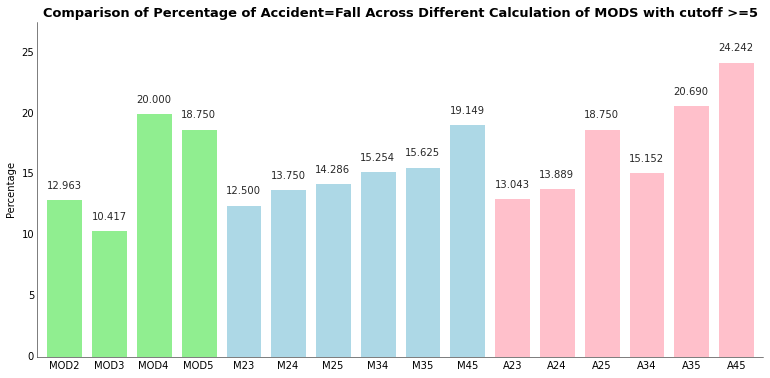

In [28]:
PlotData(data,'Accident','MVA', 5)
PlotData(data,'Accident','ATV', 5)
PlotData(data,'Accident','Fall', 5)

<a id='Age'>Figure 17: Age</a>

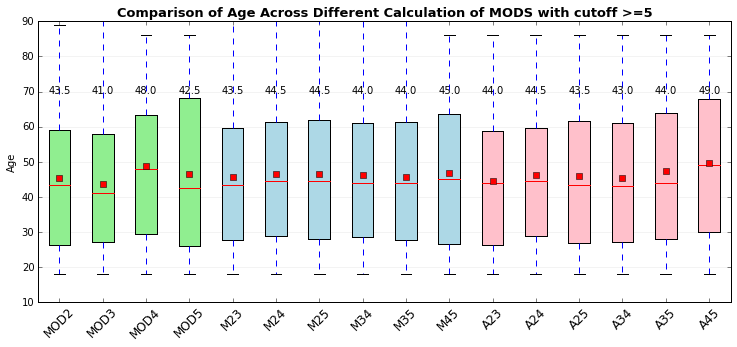

In [29]:
boxplotData(data,'Age',5)

In [30]:
import seaborn as sns
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)
def plotAge(attr, data):
    f,axes = plt.subplots(2,1)
    sns.barplot(x="Age_T", y=attr, data=data, ax = axes[0], order = [20,30,40,50,60,70,80])
    axes[0].set_title(attr)
    sns.barplot(x="Age_T", y=attr, hue='Sex', data=data, ax = axes[1],order = [20,30,40,50,60,70,80])
    axes[1].set_title(attr)

Populating the interactive namespace from numpy and matplotlib


<a id='Sex'>Figure 18: Age & Sex</a>
<ul>
<li>Top panel is the distributation of MODS for different age groups.</li>
<li>Botton panel is the distributation of MODS for different age groups seperated by sex</li>

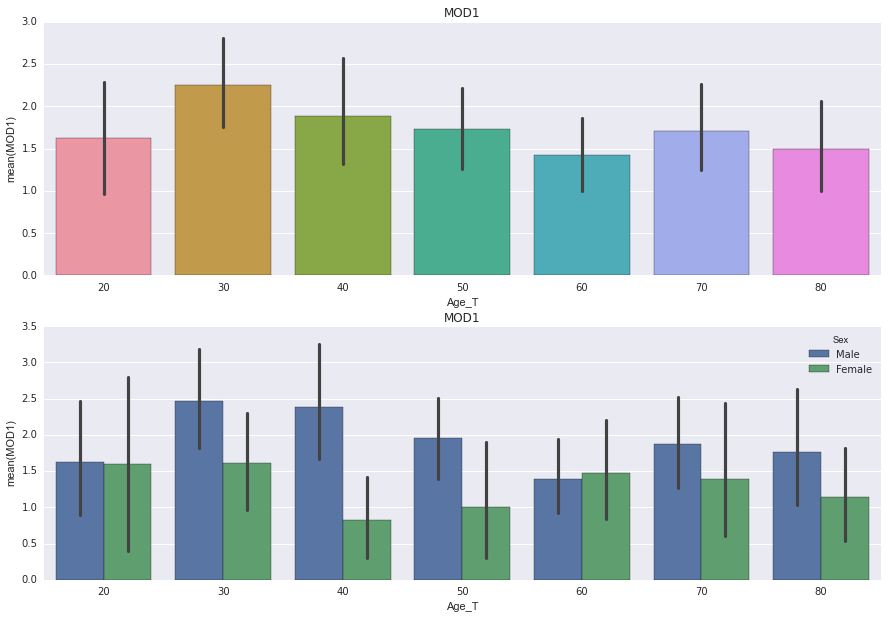

In [31]:
plotAge('MOD1', mods)

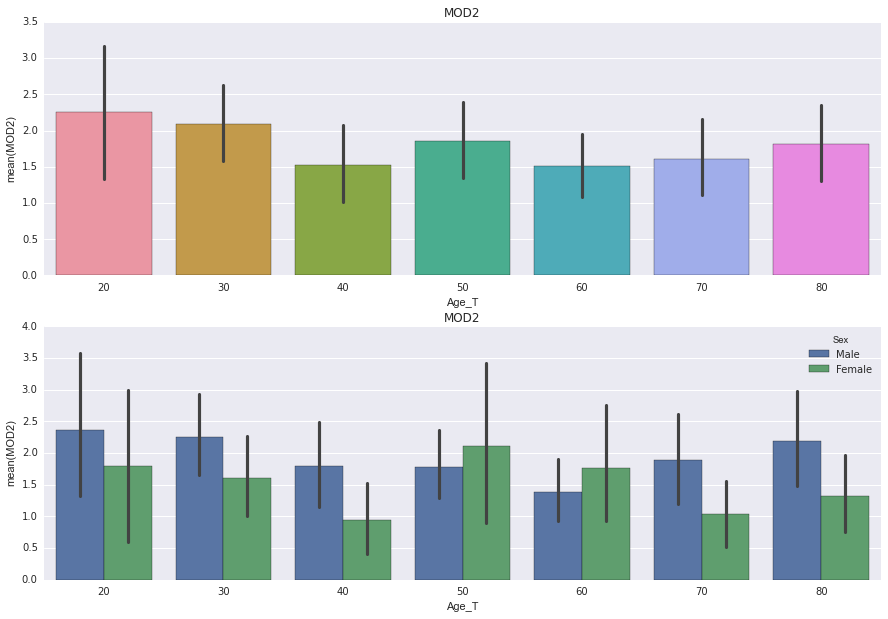

In [32]:
plotAge('MOD2', mods)

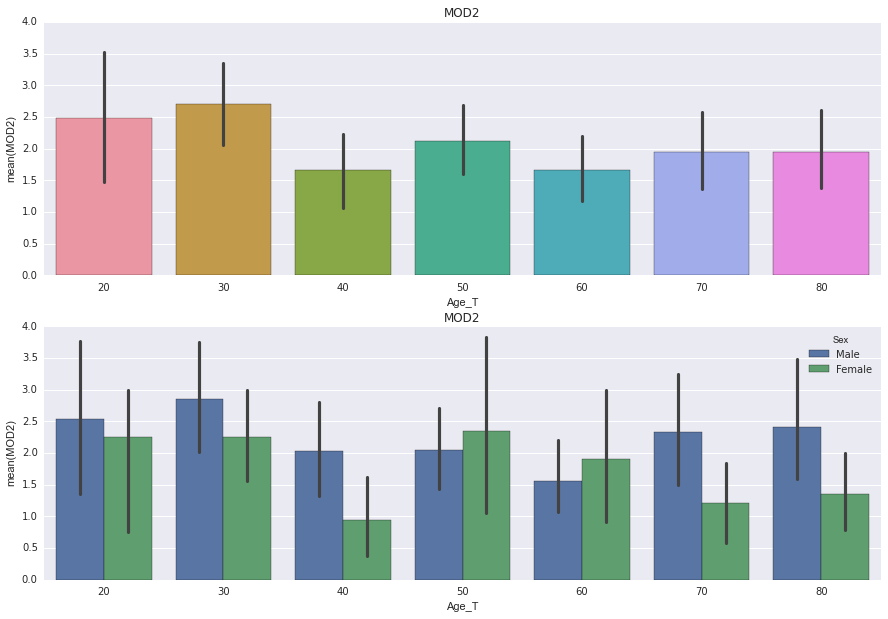

In [33]:
plotAge('MOD2',data)

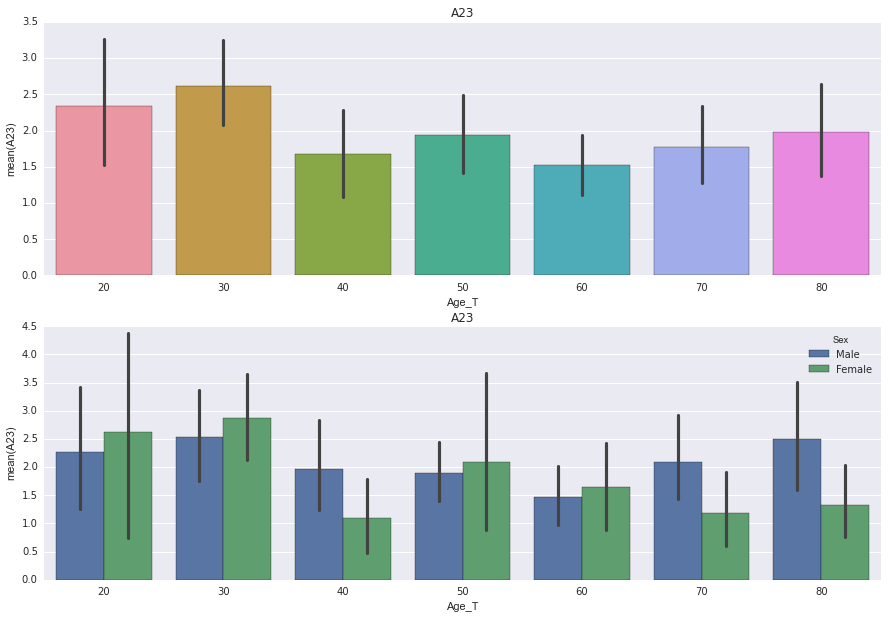

In [34]:
plotAge('A23',data)


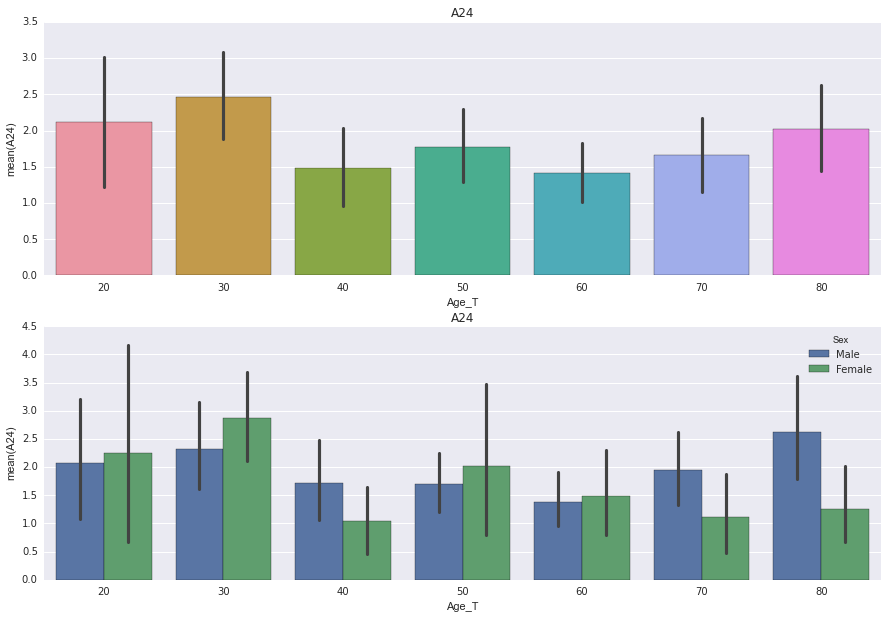

In [35]:
plotAge('A24',data)


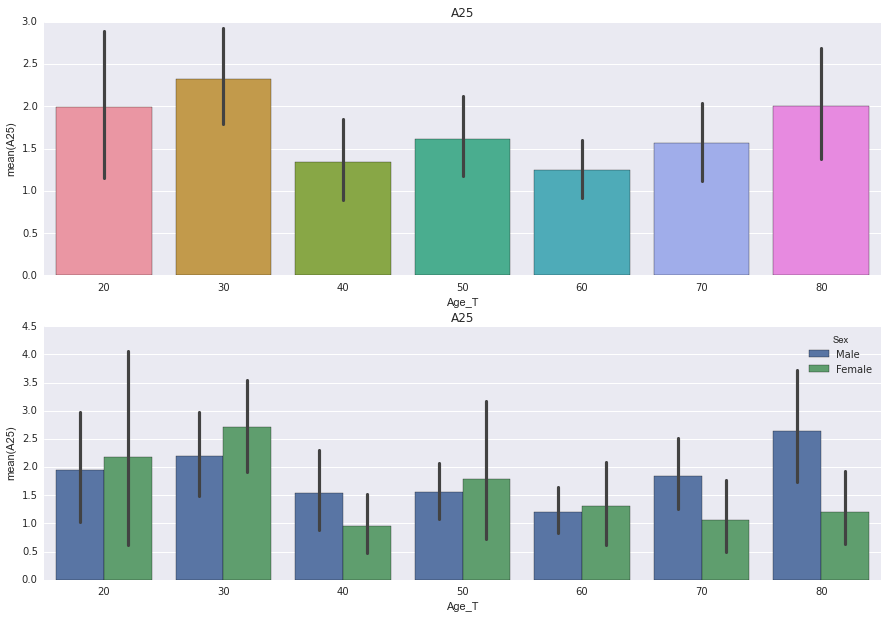

In [36]:
plotAge('A25',data)


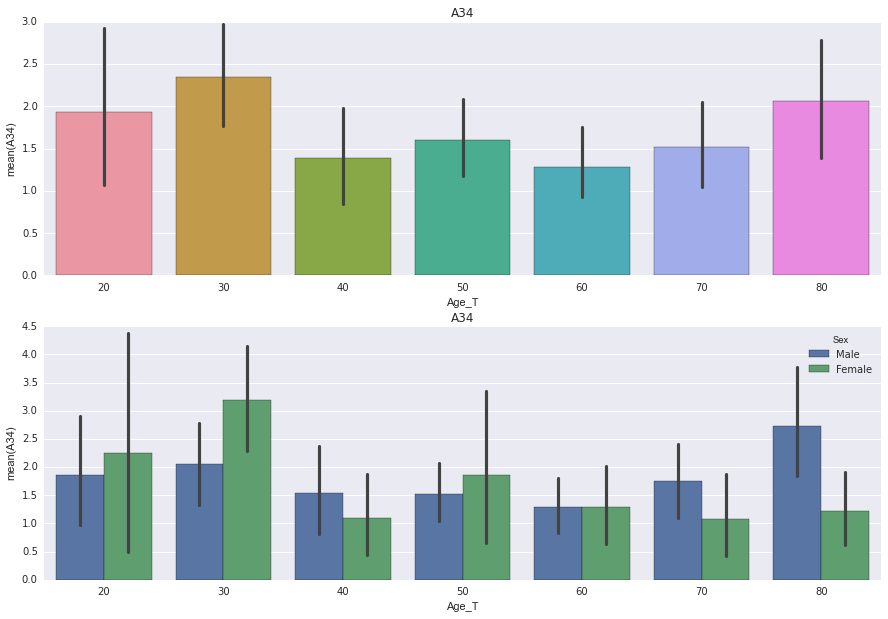

In [37]:
plotAge('A34',data)